# Support VectorMachine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split

Text(0, 0.5, '특성 1')

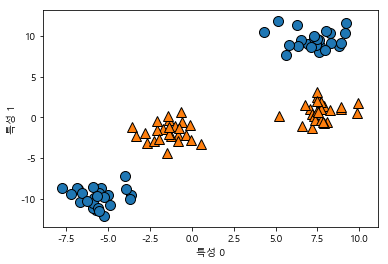

In [2]:
X, y = datasets.make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

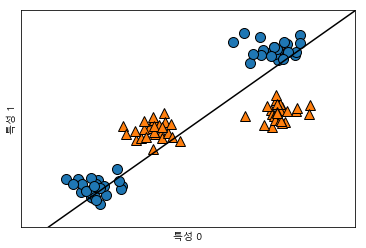

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


Text(0.5, 0, '특성1 ** 2')

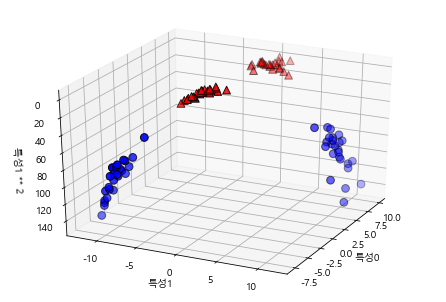

In [4]:
# 두 번째 특성을 제곱하여 추가한다.
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y==0 인 포인트를 먼저 그리고 그다음 y==1 인 포인트를 그린다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

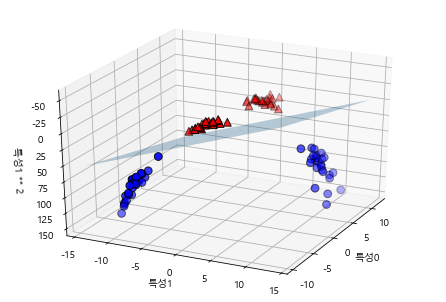

In [5]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

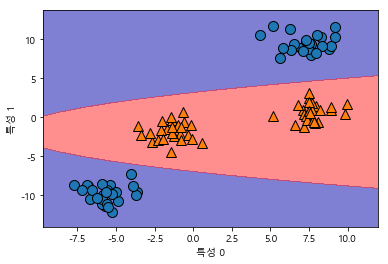

In [6]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 파라미터

In [7]:
from sklearn.svm import SVC

# 가우시안 커널: radial basic function
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = "rbf", C=10, gamma=0.1).fit(X, y)

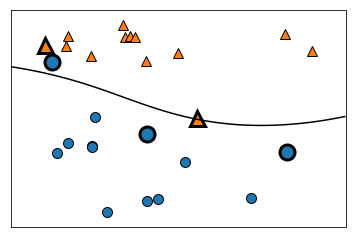

In [8]:
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

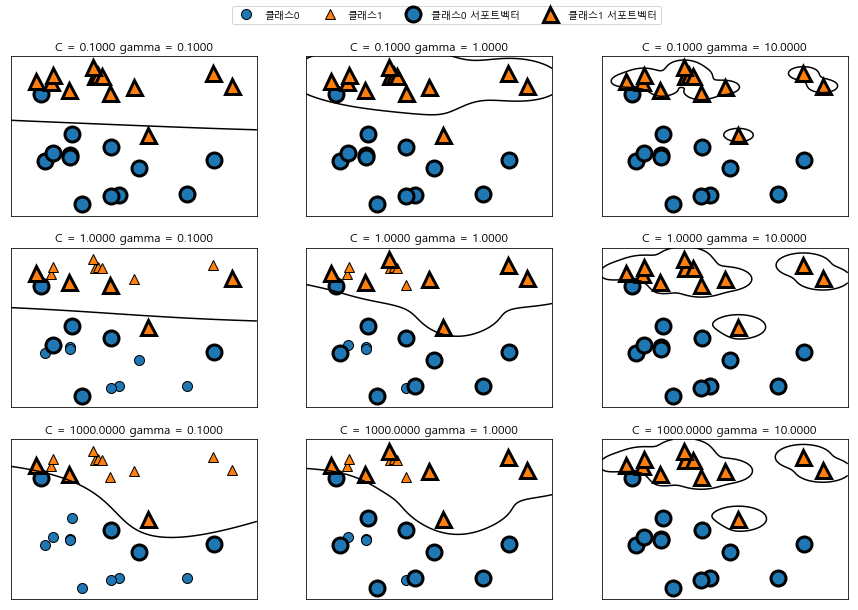

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(['클래스0', '클래스1', '클래스0 서포트벡터', '클래스1 서포트벡터'], ncol=4, loc=(.9, 1.2))

## 붓꽃 데이터를 이용한 SVM

In [10]:
iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [11]:
model = SVC().fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
print("훈련용 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트용 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련용 정확도 : 0.971
테스트용 정확도 : 0.978


## 비만 지수 분류

In [13]:
import random

def calc_bmi(h, w):
    bmi = w / (h/100)**2
    
    if bmi < 18.5:
        return "thin"
    
    if bmi < 25:
        return "normal"
    
    return "fat"

In [14]:
fp = open("data/bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\r\n")

cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120, 220)
    w = random.randint(30, 100)
    label = calc_bmi(h, w)
    
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))

fp.close()
print("OK", cnt)

OK {'thin': 7228, 'normal': 4838, 'fat': 7934}


In [1]:
tbl = pd.read_csv("data/bmi.csv")
tbl.head()

NameError: name 'pd' is not defined

In [16]:
label = tbl["label"]
w = tbl["weight"]/100
h = tbl["height"]/200

In [17]:
wh = pd.concat([w, h], axis=1)
wh.head()

,weight,height
0,1.00,0.670
1,0.98,0.855
2,0.57,0.875
3,0.58,0.850
4,0.58,0.730


In [18]:
X_train, X_test, y_train, y_test = train_test_split(wh, label)

In [19]:
clf = SVC().fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
predict = clf.predict(X_test)

In [21]:
print("훈련용 정확도 : {:.3f}".format(clf.score(X_train, y_train)))
print("테스트용 정확도 : {:.3f}".format(clf.score(X_test, y_test)))

from sklearn import metrics
cl_report = metrics.classification_report(y_test, predict)
print("레포트 : \n", cl_report)

훈련용 정확도 : 0.987
테스트용 정확도 : 0.989
레포트 : 
               precision    recall  f1-score   support

         fat       1.00      0.99      0.99      1965
      normal       0.97      0.99      0.98      1227
        thin       0.99      0.99      0.99      1808

   micro avg       0.99      0.99      0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



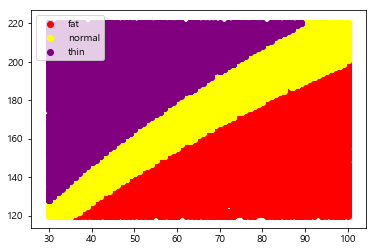

In [22]:
# 그래프 그리기
tbl = pd.read_csv("data/bmi.csv", index_col=2)
tbl.head()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"], b["height"], c=color, label = lbl)
    
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend()
plt.savefig("data/bmi_result.png")

## 유방암 데이터셋을 활용한 SVM

In [23]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer() # 569개의 데이터(악성 212개, 양성 357개), 30개의 특성

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [25]:
svc = SVC().fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
print("훈련용 정확도 : {:.3f}".format(svc.score(X_train, y_train)))
print("테스트용 정확도 : {:.3f}".format(svc.score(X_test, y_test)))

훈련용 정확도 : 1.000
테스트용 정확도 : 0.629


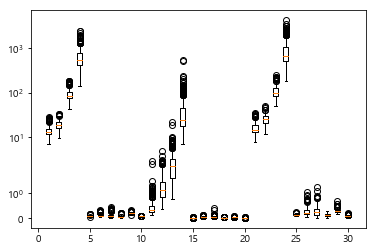

In [27]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")

In [28]:
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
# 특성별 최소값 구하기
min_on_training = X_train.min(axis=0)
min_on_testing = X_test.min(axis=0)
# 특성별 범위 구하기(최대값 - 최소값)
range_on_training = (X_train - min_on_training).max(axis=0)
range_on_testing = (X_test - min_on_testing).max(axis=0)
# 스케일 조정
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_testing) / range_on_testing
print("특성별 최소값 : ", X_train_scaled.min(axis=0))
print("특성별 최대값 : ", X_train_scaled.max(axis=0))
print("특성별 최소값 : ", X_test_scaled.min(axis=0))
print("특성별 최대값 : ", X_test_scaled.max(axis=0))

특성별 최소값 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값 :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
특성별 최소값 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값 :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [30]:
svc = SVC().fit(X_train_scaled, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
print("훈련용 정확도 : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트용 정확도 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련용 정확도 : 0.948
테스트용 정확도 : 0.951


In [32]:
svc = SVC(C=1000).fit(X_train_scaled, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
print("훈련용 정확도 : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트용 정확도 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련용 정확도 : 0.988
테스트용 정확도 : 0.804


## 농구선수 포지션 예측을 위한 SVM

In [34]:
df = pd.read_csv("data/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [35]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

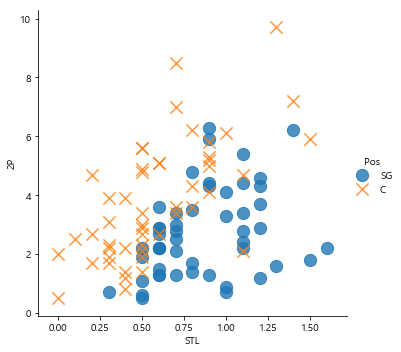

In [36]:
# 스틸, 2점슛

sns.lmplot('STL', '2P', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o", "x"], hue="Pos")

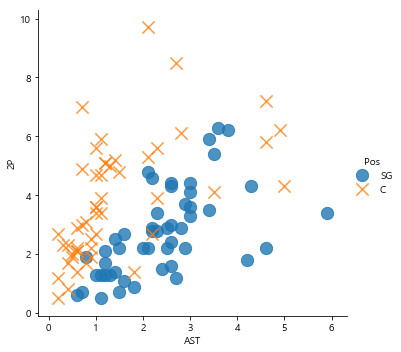

In [37]:
# 어시스트, 2점슛

sns.lmplot('AST', '2P', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o", "x"], hue="Pos")

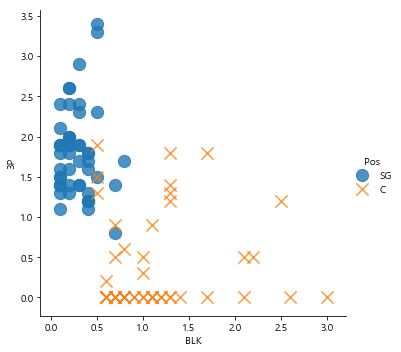

In [38]:
# 블로킹, 3점슛
sns.lmplot('BLK', '3P', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o", "x"], hue="Pos")

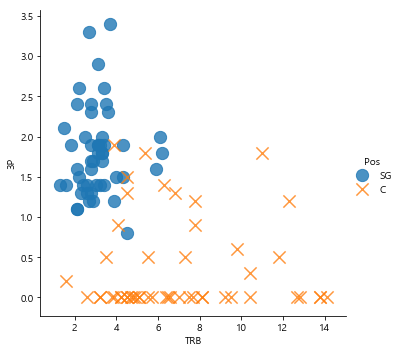

In [39]:
# 리바운드, 3점슛
sns.lmplot('TRB', '3P', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o", "x"], hue="Pos")

In [40]:
df.drop(["2P", "AST", "STL"], axis=1, inplace=True)

In [41]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [42]:
train, test = train_test_split(df, test_size=0.2)

In [55]:
train.shape[0]
test.shape[0]

80

In [44]:
# 직렬화
import pickle

with open("data/basketball_train.pkl", "wb") as train_data:
    pickle.dump(train, train_data)
    
with open("data/basketball_test.pkl", "wb") as test_data:
    pickle.dump(test, test_data)

In [45]:
# 데이터 불러오기
import pickle

with open("data/basketball_train.pkl", "rb") as train_data:
    train = pickle.load(train_data)
    
with open("data/basketball_train.pkl", "rb") as test_data:
    test = pickle.load(test_data)

In [48]:
# SVM에서 최적의 파라미터 찾기(C, gamma)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds):
    svm_params = [{"kernel":["rbf"], "gamma":[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], "C":[0.01, 0.01, 1, 10, 100, 1000]}]
    clf = GridSearchCV(SVC(), svm_params, cv=nfolds)
    clf.fit(X, y)
    print(clf.best_params_)
    return clf
    

X_train = train[['3P', 'BLK']]
y_train = train['Pos']
clf = svc_param_selection(X_train, y_train, 10)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


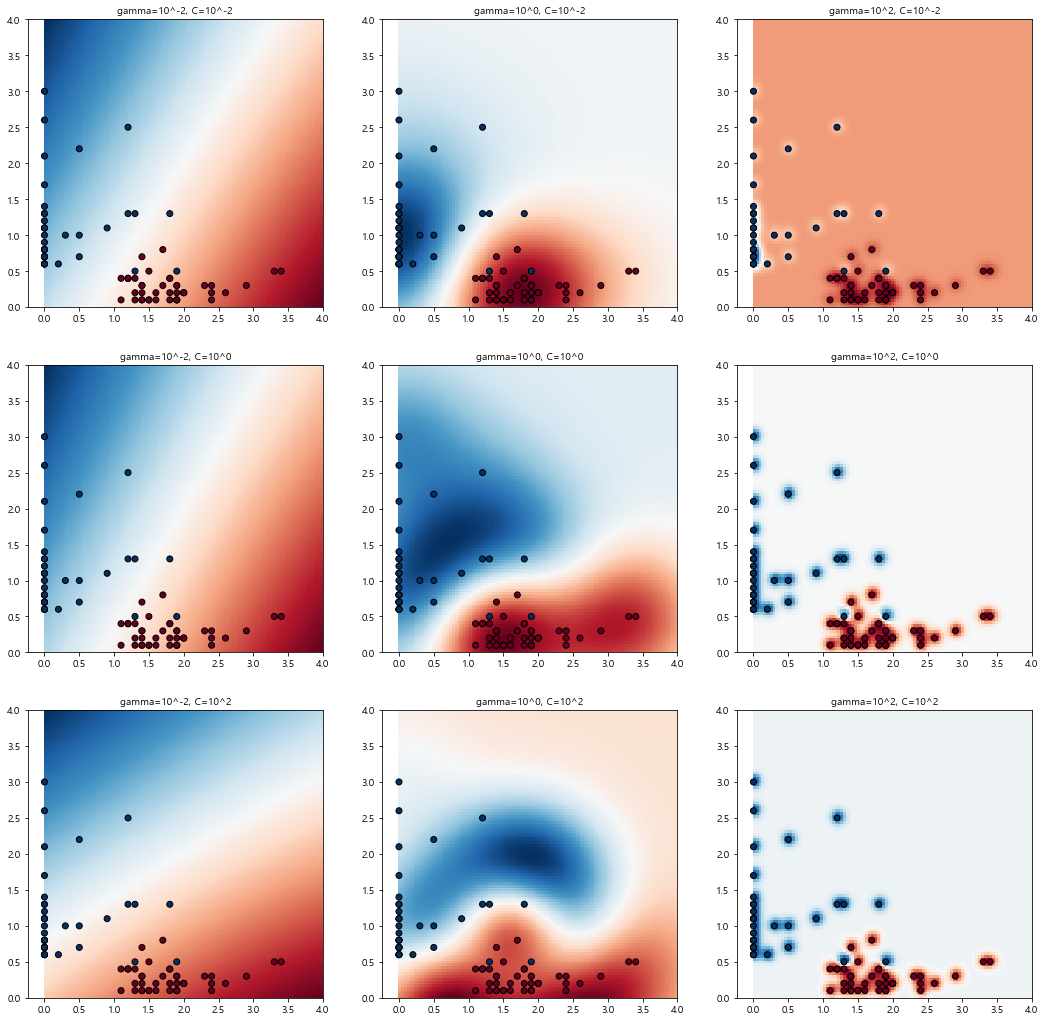

In [49]:
# 시각화(최적의 파라미터와 나머지 파리미터를 비교)
C_candidates = []
C_candidates.append(clf.best_params_["C"] * 0.01)
C_candidates.append(clf.best_params_["C"])
C_candidates.append(clf.best_params_["C"] * 100)

G_candidates = []
G_candidates.append(clf.best_params_["gamma"] * 0.01)
G_candidates.append(clf.best_params_["gamma"])
G_candidates.append(clf.best_params_["gamma"] * 100)

X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

# 포지션에 해당하는 문자열 SG와 C를 벡터화.
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

# 각각의 파라미터에 해당하는 SVM 모델을 만들어 classifiers에 저장.
classifiers = []
for C in C_candidates:
    for gamma in G_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

# 18,18 사이즈의 챠트를 구성.
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

# 각각의 모델들에 대한 결정 경계 함수를 적용하여 함께 시각화.
for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 최적의 모델을 포함한 다른 파라미터로 학습된 모델들을 함께 시각화.
    plt.subplot(len(C_candidates), len(G_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # 서포트 벡터와 결정경계선을 시각화합니다.
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

In [52]:
# 테스트
from sklearn.metrics import accuracy_score, classification_report

X_test = test[["3P", "BLK"]]
y_test = test[["Pos"]]

pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정확도 :  1.0
              precision    recall  f1-score   support

           C       1.00      1.00      1.00        38
          SG       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [56]:
df_compare = pd.DataFrame({"prediction":pred, "ground_truth":y_test.values.ravel()})
df_compare.head()

,prediction,ground_truth
0,C,C
1,SG,SG
2,SG,SG
3,C,C
4,SG,SG


# MNIST 데이터를 이용한 SVM

In [59]:
import urllib.request as req
import gzip, os, os.path


savepath = "./data/mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"
files = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz"]

# 다운로드
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)
        
# GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
print("ok")

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [77]:
import struct

def to_csv(name, maxdata):
    #레이블 파일과 이미지 파일 열기
    lbl_f = open("./data/mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./data/mnist/"+name+"-images-idx3-ubyte", "rb")
    csv_f = open("./data/mnist/"+name+".csv", "w", encoding="utf-8")
    
    #헤더 정보 읽기 
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    
    #이미지 데이터를 읽고 CSV로 저장하기
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")

        #잘 저장됐는지 이미지 파일로 저장해서 태스트 하기
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./data/mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()
        
# 결과를 파일로 출력하기
to_csv("train", 10000)
to_csv("t10k", 500)

In [78]:
struct.pack("hhh", 1, 2, 3)
struct.pack("hhl", 1, 2, 3)


b'\x01\x00\x02\x00\x03\x00\x00\x00'

In [79]:
from sklearn import model_selection, svm, metrics

def load_csv(fname):
    labels = []
    images = []
    
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2:
                continue
            
            labels.append(int(cols.pop(0)))
            
            vals = list(map(lambda n:int(n)/256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}
            
data = load_csv("./data/mnist/train.csv")
test = load_csv("./data/mnist/t10k.csv")

In [80]:
print(data['images'][0])
print(data['labels'][0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0703125, 0.0703125, 0.0703125, 0.4921875, 0.53125, 0.68359375, 0.1015625, 0.6484375, 0.99609375, 0.96484375, 0.49609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1171875, 0.140625, 0.3671875, 0.6015625, 0

In [81]:
clf = svm.SVC().fit(data["images"], data["labels"])
predict = clf.predict(test["images"])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [82]:
ac_score = metrics.accuracy_score(test["labels"], predict)
print(ac_score)

0.9161676646706587


In [83]:
cl_report = metrics.classification_report(test["labels"], predict)
print(cl_report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      1.00      0.99        67
           2       0.96      0.89      0.92        55
           3       0.93      0.85      0.89        46
           4       0.90      0.96      0.93        55
           5       0.84      0.92      0.88        50
           6       0.97      0.86      0.91        43
           7       0.87      0.92      0.89        49
           8       0.90      0.88      0.89        40
           9       0.94      0.89      0.91        54

   micro avg       0.92      0.92      0.92       501
   macro avg       0.92      0.91      0.91       501
weighted avg       0.92      0.92      0.92       501



In [85]:
pred = clf.predict([test["images"][7]])
pred

array([9])

In [86]:
print(test["labels"][7])

9


In [92]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [93]:
from IPython.display import HTML
HTML(input_form + javascript)

In [96]:
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
pred1 = clf.predict([images])
pred1

# Ensemble 기법

In [97]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [98]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [99]:
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=8, max_features=32, random_state=35)
dtree = dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)
print("정확도 : ", accuracy_score(y_test, dtree_predict))

정확도 :  0.825


In [100]:
knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print("정확도 : ", accuracy_score(y_test, knn_predict))

정확도 :  0.8444444444444444


In [103]:
svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predict = svm.predict(X_test)
print("정확도 : ", accuracy_score(y_test, svm_predict))
print(svm.predict_proba(X_test))

정확도 :  0.9
[[4.67027429e-03 1.98585964e-02 1.50718434e-02 ... 2.30712970e-02
  1.43650115e-01 2.03710160e-02]
 [1.45656907e-04 4.00375346e-05 2.87958375e-05 ... 5.73531553e-05
  5.24129269e-05 3.89949015e-05]
 [5.65396429e-03 1.75673933e-02 1.90115526e-02 ... 1.98400341e-02
  7.75296978e-01 5.32606443e-02]
 ...
 [7.66740699e-03 2.20466894e-02 7.08275474e-01 ... 3.46430812e-02
  1.20408226e-01 2.17631434e-02]
 [6.84342312e-04 1.12971085e-03 8.69944303e-04 ... 1.75494453e-03
  1.34821695e-02 9.74098813e-01]
 [1.12503341e-03 4.93233068e-03 1.64309872e-03 ... 2.84114373e-03
  1.83931620e-02 2.38602055e-03]]


In [106]:
# 하드 보팅 : 일반적인 투표와 같이, 각각의 분류기의 예측값들을 모아서 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식

voting_clf = VotingClassifier(estimators=[("decision_tree", dtree), ("knn", knn), ("svm", svm)], weights=[1, 1, 1], voting="hard").fit(X_train, y_train)
hard_voting_pred = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_pred)

0.8972222222222223

In [107]:
# 소프트 보팅 : 각각의 분류모델의 predict_proba를 활용하여, 모든 분류값들의 확률들을 더해서, 가장 높은 점수를 획득한 분류값으로 최종 결론을 내는 방식

voting_clf = VotingClassifier(estimators=[("decision_tree", dtree), ("knn", knn), ("svm", svm)], weights=[1, 1, 1], voting="soft").fit(X_train, y_train)
soft_voting_pred = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_pred)

0.9222222222222223

([<matplotlib.axis.XTick at 0x16f6feb5a58>,
 <a list of 5 Text xticklabel objects>)

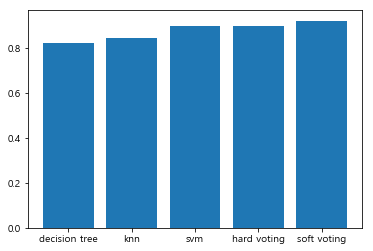

In [109]:
x = np.arange(5)
plt.bar(x, height=[accuracy_score(y_test, dtree_predict), accuracy_score(y_test, knn_predict), accuracy_score(y_test, svm_predict), accuracy_score(y_test, hard_voting_pred), accuracy_score(y_test, soft_voting_pred)])
plt.xticks(x, ["decision tree", "knn", "svm", "hard voting", "soft voting"])